1. 데이터 읽기

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#서울시 지하철 호선별 역별 승하차 인원 정보 데이터를 불러와 metro_all에 저장
#pd.read_csv를 통하여 승하차 인원 정보 데이터를 데이터프레임 형태로 읽어옴
metro_all = pd.read_csv("/content/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv", encoding = 'cp949')

#승하차 인원 정보 상위 5개 데이터를 출력
metro_all.head()

#승하차 인원 정보 데이터프레임 정보를 요약하여 출력
metro_all.info()

#metro_all DataFrame 호선명 데이터 확인
sorted(list(set(metro_all['호선'])))

#DataFrame 지하철역 데이터 확인
sorted(list(set(metro_all['지하철역'])))

#DataFrame 지하철역 데이터 개수 확인
len(list(set(metro_all['지하철역'])))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   호선            314 non-null    object
 1   지하철역          314 non-null    object
 2   04시-05시 승차인원  314 non-null    int64 
 3   04시-05시 하차인원  314 non-null    int64 
 4   05시-06시 승차인원  314 non-null    int64 
 5   05시-06시 하차인원  314 non-null    int64 
 6   06시-07시 승차인원  314 non-null    int64 
 7   06시-07시 하차인원  314 non-null    int64 
 8   07시-08시 승차인원  314 non-null    int64 
 9   07시-08시 하차인원  314 non-null    int64 
 10  08시-09시 승차인원  314 non-null    int64 
 11  08시-09시 하차인원  314 non-null    int64 
 12  09시-10시 승차인원  314 non-null    int64 
 13  09시-10시 하차인원  314 non-null    int64 
 14  10시-11시 승차인원  314 non-null    int64 
 15  10시-11시 하차인원  314 non-null    int64 
 16  11시-12시 승차인원  314 non-null    int64 
 17  11시-12시 하차인원  314 non-null    int64 
 18  12시-13시 승차인원  314 non-null    int64 
 19  12시-13시 

272

In [35]:
metro_all

,호선,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,1호선,동대문,688,23,11493,2221,9618,6755,14951,12017,...,9061,555,2415,1,221,0,0,0,0,20231103
1,1호선,동묘앞,208,1,3065,1120,3652,4528,7542,9281,...,4288,85,1680,1,318,0,0,0,0,20231103
2,1호선,서울역,700,16,8826,9093,13369,60044,42194,111515,...,14003,2333,2475,2,184,0,0,0,0,20231103
3,1호선,시청,60,1,2408,5020,4325,26689,8093,70011,...,4416,323,855,0,12,0,0,0,0,20231103
4,1호선,신설동,388,18,9245,2315,9988,8178,21304,22493,...,9543,289,2263,0,0,0,0,0,0,20231103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,9호선(연장),언주,1,0,1231,1305,2816,11735,7089,22399,...,3683,477,1055,0,45,0,0,0,0,20231103
310,9호선(연장),올림픽공원(한국체대),1,0,2386,733,7023,6250,17060,7423,...,6427,194,1797,0,7,0,0,0,0,20231103
311,9호선(연장),종합운동장,1,0,1203,220,3494,1997,9193,5415,...,3705,423,757,0,4,0,0,0,0,20231103
312,9호선(연장),중앙보훈병원,3,0,4021,880,17014,10563,46353,13902,...,8193,130,1833,0,182,0,0,0,0,20231103


2. 데이터 정제

In [36]:
# 불필요한 '작업일자' 칼럼 제거
metro_recent = metro_all.copy()  # 새로운 데이터프레임 생성
metro_recent = metro_recent.drop(columns=['작업일자'])  # '작업일자' 칼럼 제거
metro_recent

,호선,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,1호선,동대문,688,23,11493,2221,9618,6755,14951,12017,...,4866,9061,555,2415,1,221,0,0,0,0
1,1호선,동묘앞,208,1,3065,1120,3652,4528,7542,9281,...,1141,4288,85,1680,1,318,0,0,0,0
2,1호선,서울역,700,16,8826,9093,13369,60044,42194,111515,...,29305,14003,2333,2475,2,184,0,0,0,0
3,1호선,시청,60,1,2408,5020,4325,26689,8093,70011,...,10655,4416,323,855,0,12,0,0,0,0
4,1호선,신설동,388,18,9245,2315,9988,8178,21304,22493,...,3693,9543,289,2263,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,9호선(연장),언주,1,0,1231,1305,2816,11735,7089,22399,...,3405,3683,477,1055,0,45,0,0,0,0
310,9호선(연장),올림픽공원(한국체대),1,0,2386,733,7023,6250,17060,7423,...,3332,6427,194,1797,0,7,0,0,0,0
311,9호선(연장),종합운동장,1,0,1203,220,3494,1997,9193,5415,...,2814,3705,423,757,0,4,0,0,0,0
312,9호선(연장),중앙보훈병원,3,0,4021,880,17014,10563,46353,13902,...,938,8193,130,1833,0,182,0,0,0,0


3.1. 호선별 이용객 수 출력

In [37]:
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',name = 'NanumGothic'
)
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

<ipython-input-38-5533609c8482>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  metro_line = metro_recent.groupby(['호선']).mean().reset_index()


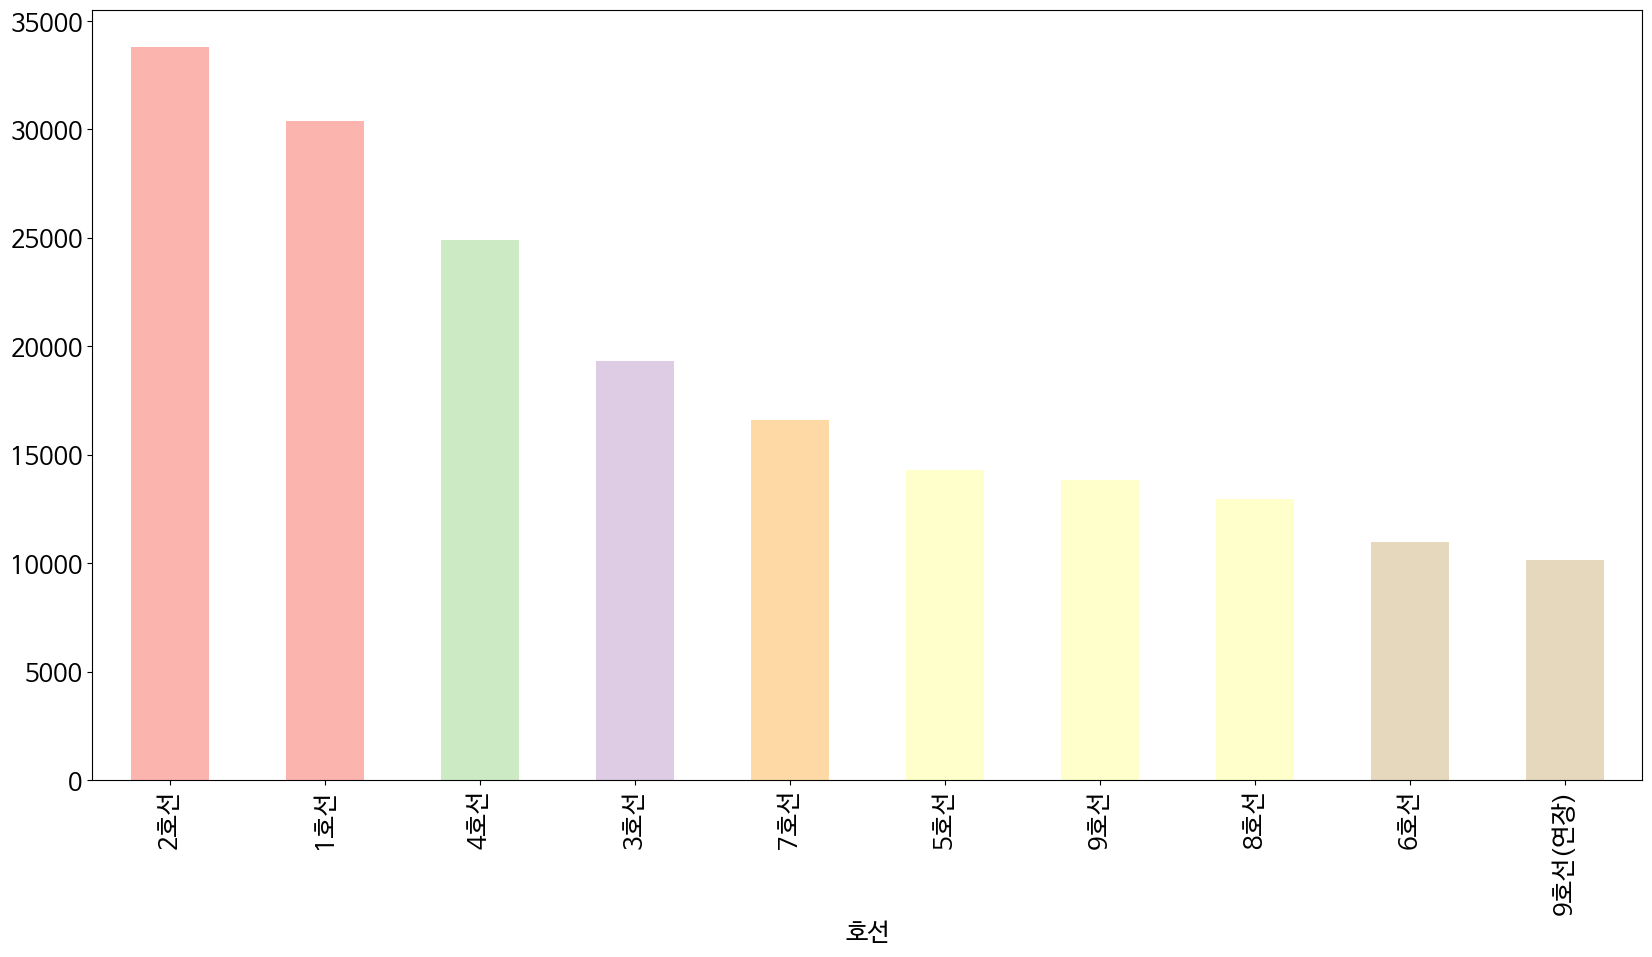

In [38]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False

metro_line = metro_recent.groupby(['호선']).mean().reset_index()
metro_line = metro_line.set_index('호선')
metro_line = metro_line.mean(axis=1).sort_values(ascending=False)

# Pastel1 색상 팔레트 적용
colors = plt.cm.Pastel1_r(metro_line / metro_line.max())

plt.figure(figsize=(20, 10))

# bar 그래프에 색상 적용
metro_line.plot(kind='bar', color=colors)

plt.show()


3.2. 특정 호선에서 역별 평균 승하차 인원 데이터 추출

In [39]:
line = '2호선'
metro_st = metro_recent.groupby(['호선', '지하철역']).mean().reset_index()
metro_st_line2 = metro_st[metro_st['호선']==line]
metro_st_line2

,호선,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
10,2호선,강남,146.0,6.0,8517.0,10191.0,17922.0,52617.0,38064.0,140707.0,...,69427.0,22842.0,11249.0,5941.0,12.0,223.0,0.0,0.0,0.0,0.0
11,2호선,강변(동서울터미널),25.0,5.0,9106.0,2338.0,27634.0,25868.0,75208.0,27431.0,...,8799.0,21962.0,794.0,4860.0,2.0,169.0,0.0,0.0,0.0,0.0
12,2호선,건대입구,368.0,7.0,16292.0,1948.0,22236.0,15534.0,53085.0,24512.0,...,43605.0,33917.0,6570.0,10389.0,4.0,743.0,0.0,0.0,0.0,0.0
13,2호선,교대(법원.검찰청),19.0,0.0,2512.0,6523.0,11087.0,26002.0,24610.0,56364.0,...,15280.0,11823.0,2984.0,2941.0,1.0,39.0,0.0,0.0,0.0,0.0
14,2호선,구로디지털단지,465.0,23.0,39446.0,5363.0,52903.0,19549.0,137534.0,77729.0,...,18475.0,48623.0,3076.0,12987.0,11.0,474.0,0.0,0.0,0.0,0.0
15,2호선,구의(광진구청),58.0,2.0,13629.0,1556.0,26470.0,21710.0,66817.0,16713.0,...,8131.0,24008.0,1193.0,6427.0,2.0,278.0,0.0,0.0,0.0,0.0
16,2호선,낙성대,32.0,0.0,11689.0,2251.0,27067.0,10663.0,81243.0,20552.0,...,8703.0,32662.0,1302.0,8195.0,3.0,215.0,0.0,0.0,0.0,0.0
17,2호선,당산,31.0,5.0,7015.0,3240.0,16588.0,12770.0,43392.0,27259.0,...,8581.0,19217.0,1213.0,4806.0,4.0,229.0,0.0,0.0,0.0,0.0
18,2호선,대림(구로구청),693.0,37.0,34649.0,3434.0,28894.0,10331.0,65284.0,21631.0,...,5343.0,21942.0,719.0,5445.0,2.0,297.0,0.0,0.0,0.0,0.0
19,2호선,도림천,3.0,0.0,429.0,349.0,1101.0,803.0,3151.0,3210.0,...,231.0,861.0,53.0,222.0,0.0,4.0,0.0,0.0,0.0,0.0


In [40]:
#승차 인원 칼럼만 추출
metro_get_on = pd.DataFrame()
metro_get_on['지하철역'] = metro_st_line2['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
  metro_get_on[metro_st_line2.columns[3+2*i]] = metro_st_line2[metro_st_line2.columns[3+2*i]]
metro_get_on = metro_get_on.set_index('지하철역')
metro_get_on

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,...,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,6.0,10191.0,52617.0,140707.0,280081.0,290545.0,146236.0,101861.0,99609.0,111190.0,...,131422.0,167464.0,102899.0,57873.0,46808.0,37996.0,22842.0,5941.0,223.0,0.0
강변(동서울터미널),5.0,2338.0,25868.0,27431.0,43739.0,37085.0,37294.0,36289.0,40892.0,44721.0,...,81043.0,108425.0,76514.0,53542.0,45316.0,40483.0,21962.0,4860.0,169.0,0.0
건대입구,7.0,1948.0,15534.0,24512.0,60057.0,50919.0,44175.0,48211.0,55312.0,62236.0,...,105863.0,151751.0,103415.0,67370.0,61963.0,55095.0,33917.0,10389.0,743.0,0.0
교대(법원.검찰청),0.0,6523.0,26002.0,56364.0,146702.0,132781.0,65656.0,56817.0,51809.0,55770.0,...,62342.0,69009.0,41607.0,26212.0,22863.0,21314.0,11823.0,2941.0,39.0,0.0
구로디지털단지,23.0,5363.0,19549.0,77729.0,205675.0,134302.0,60010.0,45395.0,49299.0,60299.0,...,110770.0,160915.0,132764.0,89109.0,87537.0,81120.0,48623.0,12987.0,474.0,0.0
구의(광진구청),2.0,1556.0,21710.0,16713.0,38741.0,23647.0,20848.0,21098.0,23275.0,26849.0,...,58803.0,94071.0,66902.0,45707.0,43583.0,39653.0,24008.0,6427.0,278.0,0.0
낙성대,0.0,2251.0,10663.0,20552.0,41271.0,35661.0,31148.0,27272.0,29271.0,31443.0,...,63362.0,97589.0,85942.0,57314.0,52767.0,52203.0,32662.0,8195.0,215.0,0.0
당산,5.0,3240.0,12770.0,27259.0,72770.0,34497.0,19073.0,17482.0,20903.0,23343.0,...,50545.0,73734.0,50334.0,34354.0,33005.0,28656.0,19217.0,4806.0,229.0,0.0
대림(구로구청),37.0,3434.0,10331.0,21631.0,50972.0,36325.0,34447.0,36289.0,35265.0,35859.0,...,62484.0,68730.0,52495.0,41328.0,49144.0,43380.0,21942.0,5445.0,297.0,0.0


In [41]:
#하차 인원 컬럼만 추출
metro_get_off = pd.DataFrame()
metro_get_off['지하철역'] = metro_st_line2['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
  metro_get_off[metro_st_line2.columns[4+2*i]] = metro_st_line2[metro_st_line2.columns[4+2*i]]
metro_get_off = metro_get_off.set_index('지하철역')
metro_get_off

,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,14시-15시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,8517.0,17922.0,38064.0,60870.0,52457.0,52874.0,67601.0,84409.0,97907.0,108519.0,...,298545.0,198756.0,156038.0,171740.0,151218.0,69427.0,11249.0,12.0,0.0,0.0
강변(동서울터미널),9106.0,27634.0,75208.0,112407.0,83962.0,66726.0,58851.0,57531.0,54067.0,47859.0,...,60754.0,46913.0,39679.0,33172.0,21736.0,8799.0,794.0,2.0,0.0,0.0
건대입구,16292.0,22236.0,53085.0,91708.0,63296.0,41487.0,40552.0,46552.0,51758.0,54038.0,...,89031.0,68031.0,70950.0,74772.0,72390.0,43605.0,6570.0,4.0,0.0,0.0
교대(법원.검찰청),2512.0,11087.0,24610.0,35354.0,28418.0,27488.0,31611.0,34163.0,40188.0,49064.0,...,125025.0,60529.0,51135.0,51478.0,39564.0,15280.0,2984.0,1.0,0.0,0.0
구로디지털단지,39446.0,52903.0,137534.0,179261.0,114579.0,73411.0,65500.0,70115.0,69972.0,63755.0,...,193444.0,98153.0,62665.0,50940.0,39422.0,18475.0,3076.0,11.0,0.0,0.0
구의(광진구청),13629.0,26470.0,66817.0,110907.0,72540.0,39447.0,33744.0,34577.0,33641.0,30327.0,...,44678.0,24224.0,18950.0,16813.0,15419.0,8131.0,1193.0,2.0,0.0,0.0
낙성대,11689.0,27067.0,81243.0,122473.0,79044.0,46044.0,39672.0,43054.0,43208.0,38366.0,...,51247.0,29607.0,23791.0,21639.0,16764.0,8703.0,1302.0,3.0,0.0,0.0
당산,7015.0,16588.0,43392.0,54683.0,35997.0,26220.0,24700.0,25761.0,24922.0,22820.0,...,56514.0,26583.0,22658.0,21253.0,17778.0,8581.0,1213.0,4.0,0.0,0.0
대림(구로구청),34649.0,28894.0,65284.0,91445.0,62532.0,41973.0,36415.0,37814.0,37402.0,34900.0,...,51970.0,26982.0,19969.0,15170.0,10906.0,5343.0,719.0,2.0,0.0,0.0


In [42]:
#역별 평균 승하차 인원을 구한 후 정수로 형변환하여 데이터프레임으로 저장
df = pd.DataFrame(index = metro_st_line2['지하철역'])
df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int)
df['평균 하차 인원 수'] = metro_get_off.mean(axis=1).astype(int)
df

,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
강남,91772,94504
강변(동서울터미널),39242,42009
건대입구,50395,48200
교대(법원.검찰청),43608,36175
구로디지털단지,69239,70102
구의(광진구청),29725,30585
낙성대,34671,35429
당산,26719,23133
대림(구로구청),32262,31511


3.3. 평균 승하차 인원 수 내림차순으로 막대그래프 출력

In [43]:
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',name = 'NanumGothic'
)
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

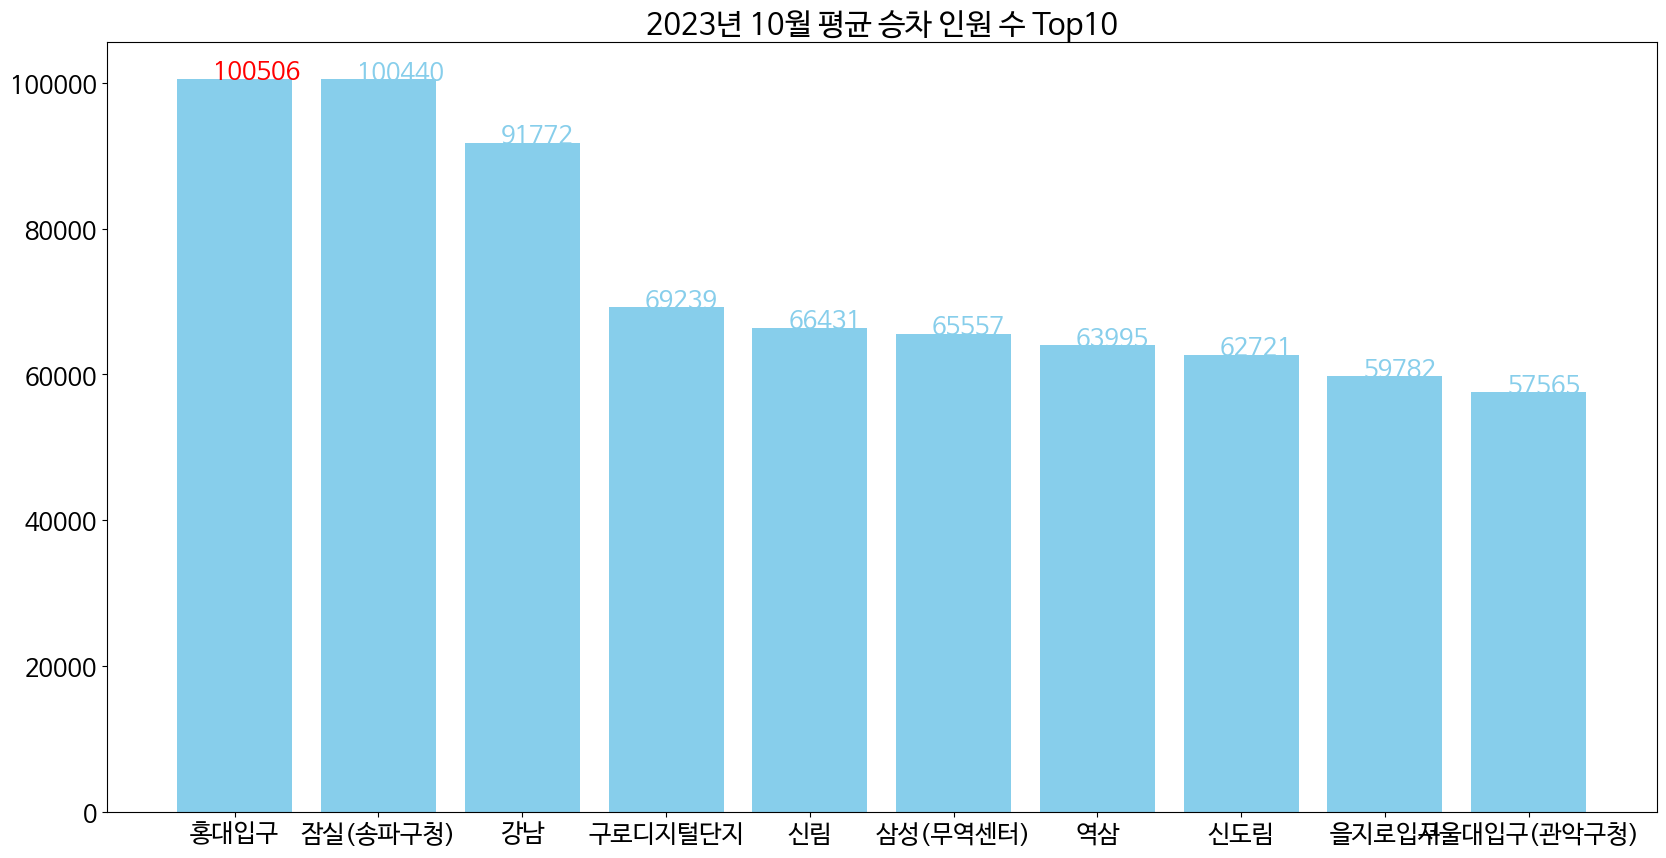

In [44]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 승차 인원 수 Top10
top10_on = df.sort_values(by='평균 승차 인원 수', ascending=False).head(10)

plt.figure(figsize=(20, 10))

# Choose a brighter pastel blue color
bar_color = 'skyblue'

plt.bar(top10_on.index, top10_on['평균 승차 인원 수'], color=bar_color)
for x, y in enumerate(list(top10_on['평균 승차 인원 수'])):
  if x == 0:
    plt.annotate(y, (x-0.15, y), color='red')
  else:
    plt.annotate(y, (x-0.15, y), color=bar_color)

plt.title('2023년 10월 평균 승차 인원 수 Top10')
plt.show()


In [45]:
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',name = 'NanumGothic'
)
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

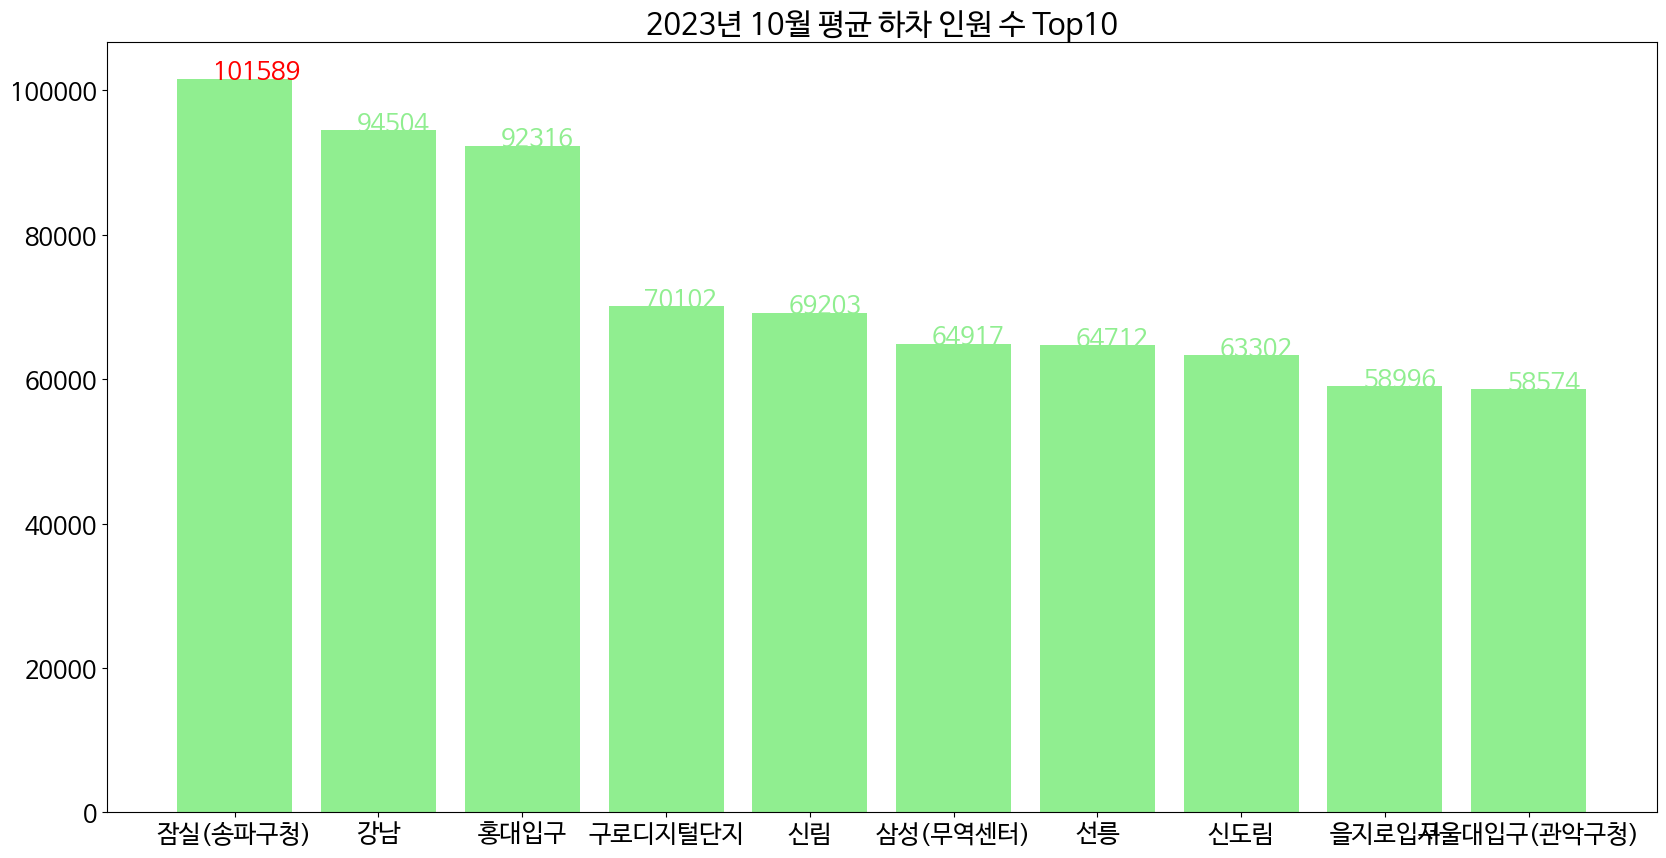

In [46]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 하차 인원 수 Top10
top10_off = df.sort_values(by='평균 하차 인원 수', ascending=False).head(10)

plt.figure(figsize=(20, 10))

# Choose a pastel green color
bar_color = 'lightgreen'

plt.bar(top10_off.index, top10_off['평균 하차 인원 수'], color=bar_color)
for x, y in enumerate(list(top10_off['평균 하차 인원 수'])):
  if x == 0:
    plt.annotate(y, (x-0.15, y), color='red')
  else:
    plt.annotate(y, (x-0.15, y), color=bar_color)

plt.title('2023년 10월 평균 하차 인원 수 Top10')
plt.show()


3.4. 특정 호선의 혼잡 정도와 위치좌표 데이터 병합

In [47]:
pip install requests pandas

In [48]:
#지하철 역별 위치좌표에 대한 데이터를 불러옵니다.
subway_location = pd.read_csv('/content/서울시 역사마스터 정보.csv', encoding = 'cp949')
subway_location

,호선,지하철역,위도,경도
0,1호선,동대문,37.571687,127.010930
1,1호선,동묘앞,37.573197,127.016480
2,1호선,서울역,37.556228,126.972135
3,1호선,시청,37.565715,126.977088
4,1호선,신설동,37.576048,127.024634
...,...,...,...,...
309,9호선(연장),언주,37.507287,127.033868
310,9호선(연장),올림픽공원(한국체대),37.516269,127.130288
311,9호선(연장),종합운동장,37.511426,127.076275
312,9호선(연장),중앙보훈병원,37.529191,127.148739


In [49]:
def get_nums_and_location(line, metro_st, subway_location):
    # 특정 호선의 데이터만 추출
    metro_line_n = metro_st[metro_st['호선'] == line]

    # 승차 인원 컬럼만 추출
    metro_get_on = metro_line_n.set_index(['지하철역', '호선']).filter(like='승차인원').stack().reset_index()
    metro_get_on.columns = ['지하철역', '호선', '시간대', '평균 승차 인원 수']
    metro_get_on = metro_get_on.groupby(['지하철역', '호선'])['평균 승차 인원 수'].mean().astype(int).reset_index()

    # 하차 인원 컬럼만 추출
    metro_get_off = metro_line_n.set_index(['지하철역', '호선']).filter(like='하차인원').stack().reset_index()
    metro_get_off.columns = ['지하철역', '호선', '시간대', '평균 하차 인원 수']
    metro_get_off = metro_get_off.groupby(['지하철역', '호선'])['평균 하차 인원 수'].mean().astype(int).reset_index()

    # 호선, 지하철역을 기준으로 병합
    df = pd.merge(metro_get_on[['지하철역', '호선', '평균 승차 인원 수']], metro_get_off[['지하철역', '호선', '평균 하차 인원 수']],
                  on=['지하철역', '호선'], how='outer')

    # 지하철역 별로 중복된 정보가 없도록 조정
    subway_location_unique = subway_location.drop_duplicates(subset=['호선', '지하철역'])

    # 호선, 위도, 경도 정보를 합침
    df = pd.merge(df, subway_location_unique[['호선', '지하철역', '위도', '경도']], on=['지하철역', '호선'], how='left')

    return df


In [50]:
line_info = get_nums_and_location('2호선', metro_st, subway_location)
line_info


,지하철역,호선,평균 승차 인원 수,평균 하차 인원 수,위도,경도
0,강남,2호선,90573,87948,37.497990,127.027912
1,강변(동서울터미널),2호선,40259,37607,37.535095,127.094681
2,건대입구,2호선,46207,48295,37.540373,127.069191
3,교대(법원.검찰청),2호선,34669,41791,37.493961,127.014667
4,구로디지털단지,2호선,67200,66354,37.485266,126.901401
5,구의(광진구청),2호선,29313,28486,37.537077,127.085916
6,낙성대,2호선,33954,33226,37.476930,126.963693
7,당산,2호선,22170,25605,37.534946,126.902767
8,대림(구로구청),2호선,30227,30917,37.493243,126.894932
9,도림천,2호선,1468,1572,37.514287,126.882768


3.5. 특정 호선의 혼잡 정도를 지도에 출력

In [51]:
import folium

#특정 위도, 경도 중심으로 하는 OpenStreetMap을 출력
map_osm = folium.Map(location = [37.529622, 126.984307], zoom_start=12)
map_osm

In [52]:
import folium

# 서울의 중심에 위치하는 명동역의 위도와 경도를 중심으로 지도 출력
명동_위도 = subway_location[subway_location['지하철역'] == '명동']['위도'].values[0]
명동_경도 = subway_location[subway_location['지하철역'] == '명동']['경도'].values[0]
map_osm = folium.Map(location=[명동_위도, 명동_경도], zoom_start=12)

# 각 지하철 역의 위치별로 원형 마커를 지도에 추가
for i in line_info.index:
    marker = folium.CircleMarker([line_info['위도'][i], line_info['경도'][i]],
                                 radius=(line_info['평균 승차 인원 수'][i] + 1) / 3000,
                                 popup=[line_info['지하철역'][i], line_info['평균 승차 인원 수'][i]],
                                 color='blue',
                                 fill_color='blue')
    marker.add_to(map_osm)

# HTML 파일로 저장
map_osm.save('subway_map.html')

map_osm